In [222]:
import numpy as np
from numpy import array as ar
import matplotlib.pyplot as plt

In [223]:
n_wells = 3;
depths = ar([5,1,3]);
widths = ar([1,2,1]);
seps = ar([3,3])

In [224]:
# There are several input variables we require:
# n_wells: the number of stimulus-response pairings in the environment. 
# depths: the depths of all wells; must be length of n_wells.
# widths: the width of all wells; must be length of n_wells.
# seps: the separation betewen wells; must be length of n_wells-1.

# after this shift, depths = V(x), such that the deepest well has V(x)=0
bg_height = np.max(depths);
depths = bg_height-depths;

# Now, we need to determine the width of the buffer region that allows
# the TISE solutions to converge. This is a function of the minimum debroglie
# wavelength for the whole system

min_debroglie = (2*np.pi)/np.sqrt(2*bg_height)

# the min debroglie wavelength also determines the resolution with which V(x)
# is discretized

dx = min_debroglie/((2**4)*np.pi)
bg_width = 2*min_debroglie

# We want to interleave the seps with the widths and have the bg_width on either side
# This is not optimal. There's definitely a more efficient method of doing this, but we're on a time crunch.
seps = np.append(bg_width,seps)
widths = np.append([val for pair in zip(seps,widths) for val in pair],bg_width)

# We want widths and depths of equal length and to describe the width and depth of the entire landscape
fd = depths
zd = bg_height*np.ones(len(fd))
depths = np.append(bg_height,[val for pair in zip(fd,zd) for val in pair])

# now we assign the number of steps in the V(x) vector for each depth value
steps = np.ceil(widths/dx)

In [225]:
# now we assign the number of steps in the V(x) vector for each depth value
bound_idxs =np.append(0,np.cumsum(steps)).astype(int)
V = np.zeros(int(np.sum(steps)))

# finally, we fill in V with a simple for loop
for i in range(len(bound_idxs)-1):
    V[bound_idxs[i]:bound_idxs[i+1]]=depths[i]



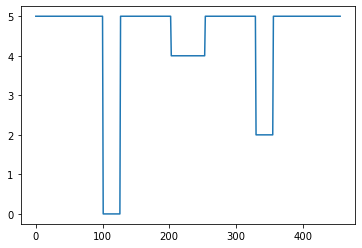